# Stroke Prediction Project


### Table of Content

- Problem and Data Understanding
- Data Exploration
- Data Preprocessing
  - Impute the missing values
  - Encode the categorical variables
- Model Building
- Model Evaluation
- Selecting the best model

## Problem and Data Understanding

### Problem Understanding

#### 1. What decisions need to be made?
Building a model to predict patients who are likely to have a stroke based on histirical data.

#### 2. What data is needed to inform those decisions?
Data on past patients both those who had stroke and those who didn't and any vital information on these patients available.

#### 3. What kind of model is needed to help make these decisions?

Binary classification models such as logistics regression, decision tree, decision trees , SVC, SDG and ensembles will be used to determine whether a customer is likely to get stroke or not.

### Installing and Importing Packages 

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from bioinfokit.analys import stat
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.pipeline import Pipeline

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from tabulate import tabulate

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Importing Dataset

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

### Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- This dataset contains 12 variables and 5110 observations.
- The variable bmi however contains less than 5110 observations. This would be explored further.

In [5]:
data.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


** Observations **
  - The variables hypertension, heart disease and the target variable, stroke are categorical so their data types will be changed below for exploratory analysis.
  - The variable id serves as a unique identifier for each patient. As such, it would be dropped.

In [6]:
data["hypertension"]=data["hypertension"].astype(str)
data["heart_disease"] = data["heart_disease"].astype(str)
data["stroke"] = data["stroke"].astype(str)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The variable bmi contains 201 missing entries while all other variables do not contain any missing entries

In [9]:
data.isnull().sum() * 100/len(data)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

The variable bmi contains about 4% missing values. Since the proportion of missing values is not significant they will be imputed later.

### Splitting Dataset Based on Data Types

In [10]:
cat_var=data.select_dtypes(include='object')
num_var = data.select_dtypes(include=np.number)

## Exploring Categorical Variables

In [11]:
for col in cat_var.columns:
  print(col)

gender
hypertension
heart_disease
ever_married
work_type
Residence_type
smoking_status
stroke


### Descriptive Analysis and Visualizations on Each Variable

In [12]:
# Writing a function to explore categorical variables

def cat_des(df,v):
  print("Description \n")
  print(df[v].describe(), "\n")
  print("======================================================")
  print(" ")
  print("Value Count \n")
  print(df[v].value_counts(),"\n")
  print("======================================================")
  print(" ")
  print("Missing Values \n")
  print(df[v].isnull().sum(),"\n")
  print("======================================================")
  print(" ")
  sns.countplot(df[v])
  plt.show()

#### Stroke

Description 

count     5110
unique       2
top          0
freq      4861
Name: stroke, dtype: object 

 
Value Count 

0    4861
1     249
Name: stroke, dtype: int64 

 
Missing Values 

0 

 


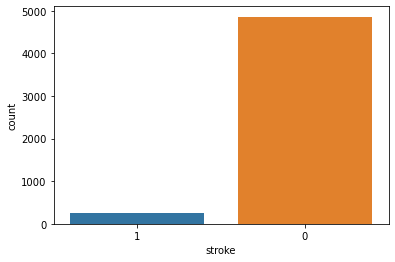

In [13]:
cat_des(data, "stroke")

Here, 1 represents a patient who had stoke and 0 otherwise.

**Observations**
  - The target variable contains no missing values.
  - There are two unique outcomes in the variable.
  - The variables are highly imbalanced with 0 occuring more often. This would be worked on later.

#### Gender

Description 

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object 

 
Value Count 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

 
Missing Values 

0 

 


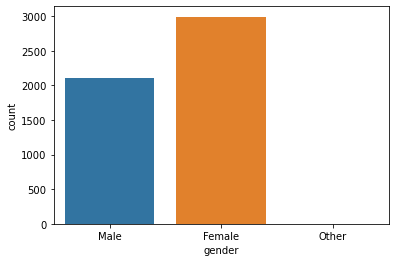

In [14]:
cat_des(data, "gender")


**Observations**
  - This variable has no missing values.
  - There are 3 unique classes for this variable.
  - The data set is balanced between males and females but other has a single observation. 

#### Hypertension

Description 

count     5110
unique       2
top          0
freq      4612
Name: hypertension, dtype: object 

 
Value Count 

0    4612
1     498
Name: hypertension, dtype: int64 

 
Missing Values 

0 

 


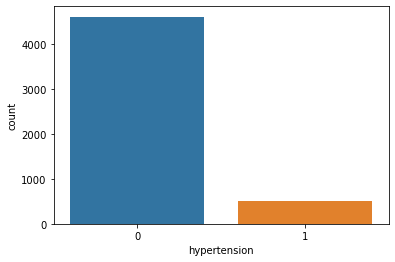

In [15]:
cat_des(data, 'hypertension')


 Here, 0 represents a patient who doesn't have hypertension and 1 otherwise.

 **Observations**

  - This variable contains no missing values.
  - There are 2 unique classes in this variable.
  - The observations are imbalanced between the 2 classes with 0 occuring more often..

#### Heart Disease

Description 

count     5110
unique       2
top          0
freq      4834
Name: heart_disease, dtype: object 

 
Value Count 

0    4834
1     276
Name: heart_disease, dtype: int64 

 
Missing Values 

0 

 


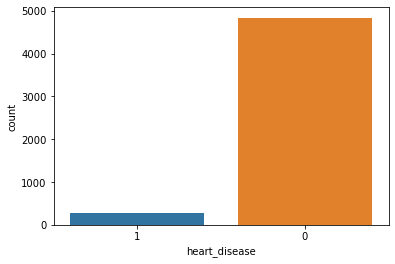

In [16]:
cat_des(data,'heart_disease' )


Here, 0 represents a patient who doesn't have any heart diseases and 1 otherwise.

**Observations**

  - There are no missing values in this observation.
  - There are 2 unique classes in this variable.
  - The variable is highly imbalanced with 0 occuring frequently.

#### Ever Married

Description 

count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object 

 
Value Count 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

 
Missing Values 

0 

 


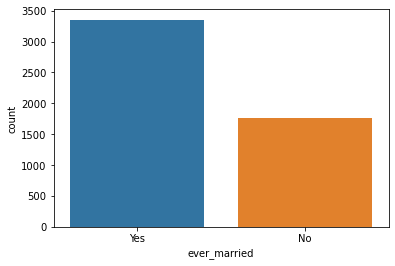

In [17]:
cat_des(data,'ever_married')



**Observations**

  - There are no missing values in this variable.
  - There are 2 unique classes in this variable.
  - The variable contains fairly balanced observation.

#### Work Type

Description 

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object 

 
Value Count 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

 
Missing Values 

0 

 


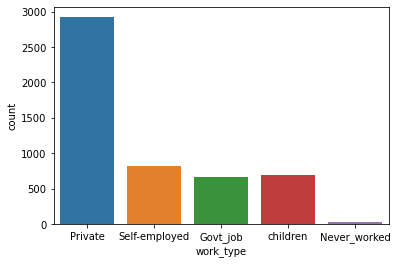

In [18]:
cat_des(data,'work_type' )



**Observations**

  - This variable contains no missing values.
  - There 5 unique classes in this variable.
  - The data points are imbalanced with Private occuring frequently and Never_worked occuring the least. As a result, that class will be added to the children class and renamed others.

In [19]:
data["work_type"].replace({"children":"Other"},inplace = True)
data["work_type"].replace({"Never_worked":"Other"},inplace = True)

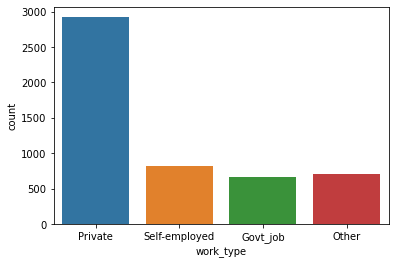

In [20]:
sns.countplot(data['work_type'])
plt.show()

The variable work_type now has 4 unique classes.

#### Residence Type

Description 

count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object 

 
Value Count 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

 
Missing Values 

0 

 


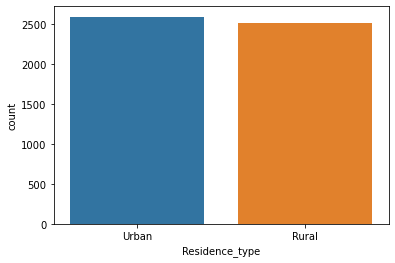

In [21]:
cat_des(data, 'Residence_type' )


**Observations**

  - This variable contains no missing values.
  - There are 2 unique classes in this variable.
  - The data points are balanced as the variable contains almost the same number of observations for each class.

#### Smoking Status

Description 

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object 

 
Value Count 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

 
Missing Values 

0 

 


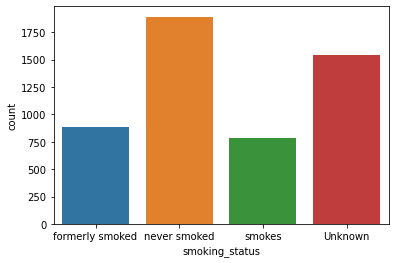

In [22]:
cat_des(data, 'smoking_status' )


**Observations**

  - This variable contains no missing values.
  - There are 4 unique classes in this variable.
  - The data points are fairly balanced.

### Checking the Relationship Among the Categorical Variables

In [23]:
# Writing a function to test the association between the categorical variables.

def association_test(df,x,y):
  tb = pd.crosstab(df[x],df[y])
  test = stat()
  test.chisq(df=tb)


  print("Null Hypothesis: {} and {} are independent".format(x,y))
  print("Alternate Hypothesis: {} and {} are not independent\n".format(x,y))

  print(test.summary)

#### Stroke and Gender

In [24]:
association_test(data,"stroke","gender")

Null Hypothesis: stroke and gender are independent
Alternate Hypothesis: stroke and gender are not independent


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2      0.472587   0.789549
Log-likelihood     2      0.519447   0.771265



Given a p-value of 0.789549 we fail to reject the null hypothesis and conclude that stroke and gender are independent. This variable will not be dropped because it might be related to other variables.

#### Stroke and Hypertension

In [25]:
association_test(data, "stroke", "hypertension")

Null Hypothesis: stroke and hypertension are independent
Alternate Hypothesis: stroke and hypertension are not independent


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       81.6054  1.66162e-19
Log-likelihood     1       59.7698  1.06627e-14



With a p-value of 1.66162e-19 which is less than 0.05 at 5% significance level, there is enough evidence to reject the null hypothesis. This means that there is a relationship between stroke and hypertension.

#### Stroke and Heart Disease

In [26]:
association_test(data, "stroke", "heart_disease")

Null Hypothesis: stroke and heart_disease are independent
Alternate Hypothesis: stroke and heart_disease are not independent


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       90.2596  2.08878e-21
Log-likelihood     1       58.7244  1.81375e-14



Given a p-value of 2.08878e-21 at 5% significance level, there is enough evidence to reject the null hypothesis and conclude that stroke and heart_disease are not independent.

#### Stroke and Ever Married

In [27]:
association_test(data, "stroke" , "ever_married")

Null Hypothesis: stroke and ever_married are independent
Alternate Hypothesis: stroke and ever_married are not independent


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       58.9239  1.6389e-14
Log-likelihood     1       69.6054  7.24401e-17



With a p-value of 1.6389e-14 at 5% significance level, there is enough evidence to reject the null hypothesis and conclude that stroke and ever_married are not independent.

#### Stroke and Work Type

In [28]:
association_test(data, "stroke", "work_type")

Null Hypothesis: stroke and work_type are independent
Alternate Hypothesis: stroke and work_type are not independent


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            3       49.1596  1.20628e-10
Log-likelihood     3       69.6296  5.12353e-15



At 5% significance level with a p-value of 1.20628e-10, there is enough evidence to reject the null hypothesis and conclude that stroke and work_type are not independent.

#### Stroke and Residence Type

In [29]:
association_test(data, "stroke", "Residence_type")

Null Hypothesis: stroke and Residence_type are independent
Alternate Hypothesis: stroke and Residence_type are not independent


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       1.08164   0.298332
Log-likelihood     1       1.08305   0.298015



With a p-value of 0.298332 and at 5% significance level, there is not enogh evidencet to reject the null hypothesis. This implies that stroke and Residence_type are independent. 

#### Stroke and Smoking Status

In [30]:
association_test(data, "stroke", "smoking_status")

Null Hypothesis: stroke and smoking_status are independent
Alternate Hypothesis: stroke and smoking_status are not independent


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            3       29.1473  2.0854e-06
Log-likelihood     3       28.1101  3.44389e-06



Given a p-value of 2.0854e-06 at 5% significance level, there is enogh evidence to reject the null hypothesis. This means that stroke and smoking_status are not independent.

 

## Exploring Numerical Variables

In [31]:
for i in num_var.columns:
  print(i)

id
age
avg_glucose_level
bmi


### Visualization of Numerical Variables

In [32]:
# Writing a function to explore categorical variables

def num_var_exp(df,x):
  print("Summary Statistics \n")
  print(df[x].apply([len, min, max, np.mean, np.median, np.std], "\n"))
  print("======================================================")
  print(" ")
  print("Missing Values \n")
  print(df[x].isnull().sum(), "\n")
  print("======================================================")
  print(" ")
  plt.figure(figsize = (8, 4))
  # plotting a boxplot
  mnpp = dict(marker =  "D", markeredgecolor = "black", markerfacecolor = "red")
  mdp = dict(linestyle = "-", linewidth = 3, color = "gold")
  plt.subplot(1,2,1)
  plt.boxplot(df[x],vert = True, patch_artist = True, notch = True,
              showmeans =  True, medianprops = mdp, meanprops = mnpp)
  plt.xlabel(df[x].name)
  plt.title("Boxplot")

  # plotting a histogram
  plt.subplot(1,2,2)
  plt.hist(df[x])
  plt.title("Histogram")
  plt.tight_layout()
  plt.show()


#### Age

Summary Statistics 

len       5110.000000
min          0.080000
max         82.000000
mean        43.226614
median      45.000000
std         22.612647
Name: age, dtype: float64
 
Missing Values 

0 

 


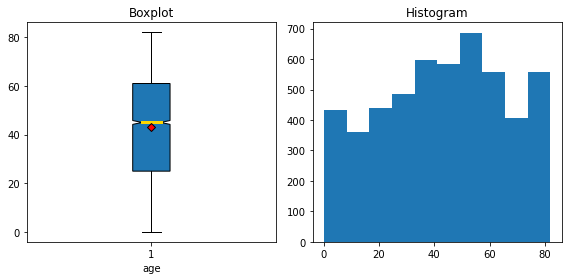

In [33]:
num_var_exp(data, "age")

**Observations**

  - There are no missing observations in this variable.
  - There are no outliers in this variable. Howerver, the variable will be scaled during modelling. This is because the minimum and maximum values are quite far from the mean and median even though they are not considered  as outliers.
  - The variable is approximately normally distributed.

#### Average Glucose Level

Summary Statistics 

len       5110.000000
min         55.120000
max        271.740000
mean       106.147677
median      91.885000
std         45.283560
Name: avg_glucose_level, dtype: float64
 
Missing Values 

0 

 


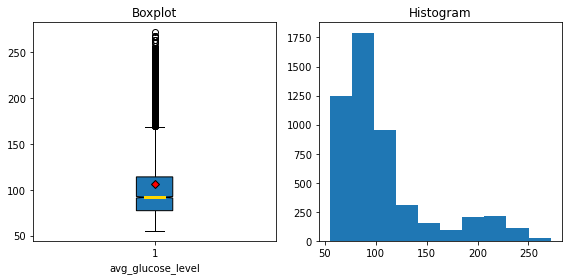

In [34]:
num_var_exp(data,"avg_glucose_level")

**Observations**

  - There are no missing observations in this variable.
  - This variable contains a lot of outliers.
  - The variable is skewed to the right. Scaling will be done during modelling.

#### BMI

Summary Statistics 

len       5110.000000
min         10.300000
max         97.600000
mean        28.893237
median      28.100000
std          7.854067
Name: bmi, dtype: float64
 
Missing Values 

201 

 


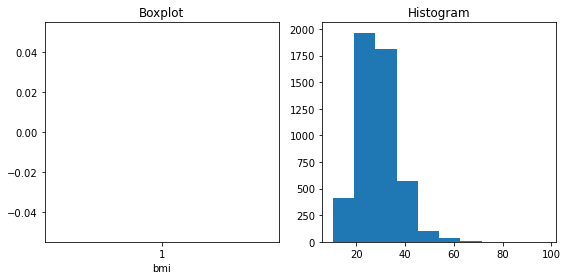

In [35]:
num_var_exp(data, "bmi")

**Observations**

  - This variable contains missing values which will be imputed. Since the mean and median are not so far apart, it means the mean is not influenced by outliers. As such the mean will be used for the imputation.
  - This variable is not normally distributed.
  - This variable may contain outliers.

### Correlation Analysis on Numerical Variables

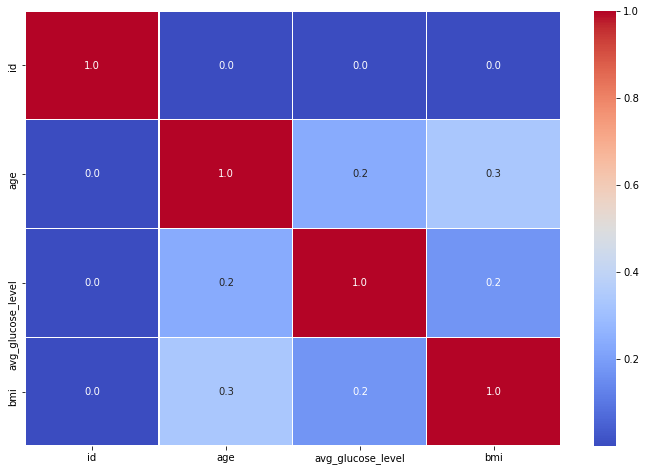

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(num_var.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

There seems not to be correlation amongst the numerical variables. Thus no multicolinearity.

## Data Preprocessing

### Dealing with Irrelevant Features

In [37]:
# Dropping irrelevant columns

df = data.drop(columns=["id"], axis = 1)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


### Dealing with Missing Values

In [38]:
mean_age = round(df['bmi'].mean(),1)
df["bmi"] = df["bmi"].fillna(mean_age)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Converting Categorical Variables to Dummies

In [39]:
# Encoding Categorical Variables

df = pd.get_dummies(df, columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], drop_first = True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Other,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,1,1,0,0
1,61.0,0,0,202.21,28.9,1,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,1,0


In [40]:
# Conerting hypertension, heart disease and stroke back to integer

df["hypertension"]=df["hypertension"].astype(int)
df["heart_disease"] = df["heart_disease"].astype(int)
df["stroke"] = df["stroke"].astype(int)

## Exploring Cleaned Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Male                     5110 non-null   uint8  
 7   gender_Other                    5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Other                 5110 non-null   uint8  
 10  work_type_Private               5110 non-null   uint8  
 11  work_type_Self-employed         5110 non-null   uint8  
 12  Residence_type_Urban            51

**Observations**

  - There are now 15 predictor variables and the target variable.
  - There are no missing values in the dataset.
  - Encoding was also successful.

In [42]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Other,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,1,1,0,0
1,61.0,0,0,202.21,28.9,1,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,1,0


The variables  age, bmi and avg_glucose_level, contain values relatively larger compared to the other variables. To prevent the model to be built from being biased towards those varibles, a scalar will be applied later.

## Splitting the Target Varible from the Other Features

In [43]:
X = df.drop(["stroke"], axis = 1)
y = df["stroke"]

## Splitting Dataset into Train and Test Sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, stratify=y,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3577, 15) (3577,)
(1533, 15) (1533,)


## Balancing the Training Dataset

In [45]:
over = SMOTE()
under = RandomUnderSampler()
steps = [("over", over), ("under",under)]
X_train,y_train = over.fit_resample(X_train,y_train)
X_train,y_train = under.fit_resample(X_train,y_train)

print(X_train.shape, y_train.shape)

(6806, 15) (6806,)


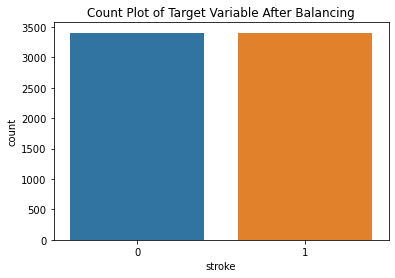

In [46]:
# Visualizing Target Variable after Balancing

sns.countplot(y_train)
plt.title("Count Plot of Target Variable After Balancing")
plt.show()

## Model Training

### Logistic Regression

#### Base Model

In [47]:
lrb = LogisticRegression(solver='sag',random_state=42)
lrb.fit(X_train,y_train)

print("Train score: {}".format(lrb.score(X_train,y_train)))
print("Test score: {}".format(lrb.score(X_test,y_test)))

Train score: 0.8502791654422568
Test score: 0.7879973907371167


#### Hyperparmeter Tuning on Logistic Regression

In [48]:
# hyperparameter tuning using gridsearch and cross validation

# Instantiating the model
lr = LogisticRegression(random_state=42)

param_grid_lr = [{'solver':['saga'],'C':[0.1,1,10],'penalty':['elasticnet','l1','l2']},
               {'solver':['lbfgs'],'C':[0.1,1,10],'penalty':['l2']},
               {'solver':['sag'],'C':[0.1,1,10], 'penalty':['l2']},
               {'solver':['newton-cg'],'C':[0.1,1,10], 'penalty':['l2']},
               {'solver':['liblinear'],'C':[0.1,1,10], 'penalty':['l1','l2']}]

gs_lr = GridSearchCV( lr, param_grid= param_grid_lr, cv=5)

gs_lr.fit(X_train, y_train)
print("Best parameters: {}".format(gs_lr.best_params_))
print("Best Train score:",gs_lr.score(X_train,y_train) )
print("Best Test score: {}".format(gs_lr.score(X_test,y_test)))
print("Best Cross-Validation Accuracy: {}".format(gs_lr.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Train score: 0.8699676755803702
Best Test score: 0.8330071754729289
Best Cross-Validation Accuracy: 0.8690856360476069


#### Logistic Regression with Best Hyperparameters

In [49]:
hp_lr = LogisticRegression(C= 10, solver= 'lbfgs', random_state=42, penalty= 'l2' )
hp_lr.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

### Support Vector Classifier

#### Base Model

In [50]:
bm_svc = SVC(kernel='linear',random_state=42)
bm_svc.fit(X_train,y_train)

print("Train score:",bm_svc.score(X_train,y_train) )
print("Test score: {}".format(bm_svc.score(X_test,y_test)))

Train score: 0.8657067293564502
Test score: 0.8349641226353555


#### Hyperparameter Tuning on SVC

In [51]:
# Hyperparameter tuning using gridsearch and cross validation

# Instantiating the model

Svc = Pipeline([("scaler", StandardScaler()), ("svc", SVC(probability= True))])
param_svc = [{
'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]


gd_svc = GridSearchCV(Svc, param_grid=param_svc, cv=5)
gd_svc.fit(X_train,y_train)

print("Best parameters: {}".format(gd_svc.best_params_))
print("Best Train score:",gd_svc.score(X_train,y_train) )
print("Best Test score: {}".format(gd_svc.score(X_test,y_test)))
print("Best Cross-Validation Accuracy: {}".format(gd_svc.best_score_))

Best parameters: {'svc__C': 10, 'svc__gamma': 10}
Best Train score: 0.9985307081986482
Best Test score: 0.923679060665362
Best Cross-Validation Accuracy: 0.9535702455976807


#### SVC with Best Hyperparameters

In [52]:
hp_svc = SVC(C= 100,gamma=10 , probability= True)
hp_svc.fit(X_train,y_train)

SVC(C=100, gamma=10, probability=True)

### Stochastic Gradient Descent

#### Base Model

In [53]:
bm_sgd = SGDClassifier(random_state=42)
bm_sgd.fit(X_train,y_train)

print("Train score:",bm_sgd.score(X_train,y_train) )
print("Test score: {}".format(bm_sgd.score(X_test,y_test)))

Train score: 0.6356156332647663
Test score: 0.9367253750815394


#### Hyperparameter Tuning on SGD

In [54]:
# Hyperparameter tuning using gridsearch and cross validation

# Instantiating the model

params_sgd = {
    "sgd__loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "sgd__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "sgd__penalty" : ["l2", "l1", "none"]}

#sdg = SGDClassifier(max_iter=100,random_state = 42)
sgd = Pipeline([("scaler", StandardScaler()), ("sgd", SGDClassifier(max_iter=100,random_state = 42))])
gs_sgd = GridSearchCV(estimator=sgd, param_grid=params_sgd, n_jobs=-1) 
gs_sgd.fit(X_train, y_train) 
print('Best Cross-Validation Accuracy: ', gs_sgd.best_score_) 
print("Best Train score:",gs_sgd.score(X_train,y_train) )
print("Best Test score: {}".format(gs_sgd.score(X_test,y_test)))
print('Best Paramameters: ', gs_sgd.best_params_)

Best Cross-Validation Accuracy:  0.868204255098771
Best Train score: 0.8717308257419923
Best Test score: 0.8303979125896934
Best Paramameters:  {'sgd__alpha': 0.01, 'sgd__loss': 'log', 'sgd__penalty': 'l2'}


#### SGD with Best Hyperparameters

In [55]:
hp_sgd = SGDClassifier(alpha= 0.01,loss= 'log' ,penalty='l2' ,max_iter=100,random_state = 42)
hp_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.01, loss='log', max_iter=100, random_state=42)

### Decision Tree

#### Base Model

In [56]:
bm_dtr = DecisionTreeClassifier(random_state=42)
bm_dtr.fit(X_train,y_train)

print("Train Score: {}".format(bm_dtr.score(X_train,y_train)))
print("Test Score: {} ".format(bm_dtr.score(X_test,y_test)))

Train Score: 1.0
Test Score: 0.8760600130463144 


#### Hyperparameter Tuning on Decision Tree

In [57]:
# Hyperparameter tuning using gridsearch and cross validation

# Instantiating the model

params_dtr = {'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
          'splitter':['best','random']
          }

dtr = DecisionTreeClassifier(random_state=42)

gs_dtr = GridSearchCV(dtr, params_dtr, n_jobs=-1,cv=5)
gs_dtr.fit(X_train,y_train)

print('Best Cross-Validation Accuracy: ', gs_dtr.best_score_) 
print("Best Test score: {}".format(gs_dtr.score(X_test,y_test)))
print("Best Train score: {}".format(gs_dtr.score(X_train,y_train)))
print('Best Paramameters: ', gs_dtr.best_params_)

Best Cross-Validation Accuracy:  0.924919916145272
Best Test score: 0.878016960208741
Best Train score: 0.9988245665589186
Best Paramameters:  {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}


#### Decision Tree with Best Hyperparameters

In [58]:
hp_dtr = DecisionTreeClassifier(criterion= "entropy" , max_depth = 15, splitter="random", random_state=42)
hp_dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42,
                       splitter='random')

### Random Forest Classifier

#### Base Model

In [59]:
bm_rfc = RandomForestClassifier(random_state=42)
bm_rfc.fit(X_train,y_train)

print("Train Score: {}".format(bm_rfc.score(X_train,y_train)))
print("Test Score: {} ".format(bm_rfc.score(X_test,y_test)))

Train Score: 1.0
Test Score: 0.9041095890410958 


#### Hyperparameter Tuning on Random Forest

In [60]:
# Hyperparameter tuning using gridsearch and cross validation

# Instantiating the model

params_rfc =  {'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110, None],
    'max_features': [2, 3,"auto", "sqrt", "log2"],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 50, 80, 100, 200]}

rfc = RandomForestClassifier(random_state=42)

gs_rfc = GridSearchCV(rfc, params_rfc, n_jobs=-1,cv=5)
gs_rfc.fit(X_train, y_train)

print('Best Cross-Validation Accuracy: ', gs_rfc.best_score_) 
print("Best Test score: {}".format(gs_rfc.score(X_test,y_test)))
print("Best Train score: {}".format(gs_rfc.score(X_train,y_train)))
print('Best Paramameters: ', gs_rfc.best_params_)

Best Cross-Validation Accuracy:  0.9490155269350407
Best Test score: 0.9021526418786693
Best Train score: 0.9867763737878342
Best Paramameters:  {'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}


#### Random Forest With Best Hyperparameters

In [61]:
hp_rfc = RandomForestClassifier(bootstrap= False, max_depth= 80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)
hp_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features=3,
                       min_samples_leaf=3, min_samples_split=8,
                       random_state=42)

## Model Evaluation

The evaluation metrics to be used are:
  * F1 score
  * Precision
  * ROC
  * Training Score
  * Test Score
  * Confusion Matrix
  * Accuracy
  * ROC Curve

In [62]:
# For Logistic Regression
lr_ypred = hp_lr.predict(X_test)
tn_lr = hp_lr.score(X_train,y_train)
tt_lr = hp_lr.score(X_test, y_test)
f1_lr = f1_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred)
acc_lr = accuracy_score(y_test, lr_ypred)



# For SVC
svc_pred = hp_svc.predict(X_test)
tn_svc = hp_svc.score(X_train,y_train)
tt_svc = hp_svc.score(X_test, y_test)
f1_svc = f1_score(y_test, svc_pred)
pre_svc = precision_score(y_test, svc_pred)
acc_svc = accuracy_score(y_test, svc_pred)


# For SDG 
sgd_pred = hp_sgd.predict(X_test)
tn_sgd = hp_sgd.score(X_train,y_train)
tt_sgd = hp_sgd.score(X_test,y_test)
f1_sgd = f1_score(y_test, sgd_pred)
pre_sgd = precision_score(y_test, sgd_pred)
acc_sgd = accuracy_score(y_test, sgd_pred)


# For Decision Tree
dtr_pred = hp_dtr.predict(X_test)
tn_dtr = hp_dtr.score(X_train,y_train)
tt_dtr = hp_dtr.score(X_test,y_test)
f1_dtr = f1_score(y_test, dtr_pred)
pre_dtr = precision_score(y_test, dtr_pred)
acc_dtr = accuracy_score(y_test, dtr_pred)


# For Random Forest
rfc_pred = hp_rfc.predict(X_test)
tn_rfc = hp_rfc.score(X_train,y_train)
tt_rfc = hp_rfc.score(X_test,y_test)
f1_rfc = f1_score(y_test, rfc_pred)
pre_rfc = precision_score(y_test, rfc_pred)
acc_rfc = accuracy_score(y_test, rfc_pred)

In [63]:
model = ["Logistic Regression","Random Forest", "SVC", "SDG", "Decision Tree"]
tn = [tn_lr,tn_rfc,tn_svc,tn_sgd,tn_dtr]
tt = [tt_lr,tt_rfc,tt_svc,tt_sgd,tt_dtr]
f1 = [f1_lr,f1_rfc,f1_svc,f1_sgd,f1_dtr]
pre = [pre_lr,pre_rfc,pre_svc,pre_sgd,pre_dtr]
acc = [acc_lr,acc_rfc,acc_svc,acc_sgd,acc_dtr]

In [64]:
metrics = {"Model" : model, "Train Score": tn, "Test Score" : tt, "F1 Score": f1, "Precision": pre, "Accuracy": acc}
pdf = pd.DataFrame(metrics)
pdf

,Model,Train Score,Test Score,F1 Score,Precision,Accuracy
0,Logistic Regression,0.867911,0.835616,0.217391,0.141700,0.835616
1,Random Forest,0.986923,0.904110,0.098160,0.090909,0.904110
2,SVC,1.000000,0.951076,0.000000,0.000000,0.951076
3,SDG,0.752130,0.899543,0.245098,0.193798,0.899543
4,Decision Tree,0.984866,0.862361,0.152610,0.109195,0.862361


In [65]:
print("\nLogistic Regression Model:")
print(confusion_matrix(y_test, lr_ypred))
print("\nXGBoost Model:")
print(confusion_matrix(y_test, rfc_pred))
print("\nSVC Model")
print(confusion_matrix(y_test, svc_pred))
print("\nSDG Model:")
print(confusion_matrix(y_test, sgd_pred))
print("\nDecision Tree Model")
print(confusion_matrix(y_test, dtr_pred))


Logistic Regression Model:
[[1246  212]
 [  40   35]]

XGBoost Model:
[[1378   80]
 [  67    8]]

SVC Model
[[1458    0]
 [  75    0]]

SDG Model:
[[1354  104]
 [  50   25]]

Decision Tree Model
[[1303  155]
 [  56   19]]


/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/tensors/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge